In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from LSSVMRegression import LSSVMRegression

In [2]:
#Generating the synthetic data
x=np.array([np.random.uniform(low=-5,high=5,size=10)]).T
#array([[0,1,2,3]]).T  #create a column vector of 1 feature, 4 samples
y=np.sinc(x).ravel()  #create the associated targets, needs to be a 1D array
ndata=x.shape[0]           #keep track of the number of rows

In [3]:
clfrbf=LSSVMRegression(
        gamma=100,       #set the gamma-hyper parameter equal to 1
        kernel='rbf', #use the linear kernel
        sigma=1.0
            )
clfrbf.fit(x,y) # train our model, aka solve the set of linear equations
print("b = ",clfrbf.intercept_)#截距
print("a_i = ",clfrbf.coef_)#支持向量的系数

b =  0.03528298005610515
a_i =  [-0.92834809 -1.02265658  3.18290106 -0.43830876  0.59510178 -4.05812758
  2.23289192  0.19561716  2.51002927 -2.26910018]


In [4]:
#generate a dens mesh
xmin=-5
xmax=5
xPred=np.linspace((xmin,),(xmax,),2001)#预测集
yExact=np.sinc(xPred).ravel()
# and predict
yPred=clfrbf.predict(xPred)

print("Yexact=",yExact)
print("Ypred=",yPred)

Yexact= [3.89817183e-17 1.00095984e-03 2.00367839e-03 ... 2.00367839e-03
 1.00095984e-03 3.89817183e-17]
Ypred= [ 0.05768554  0.05786157  0.05803618 ... -0.11672963 -0.11555993
 -0.11439444]


Mean squared error: 0.02
Coefficient of determination: 0.76


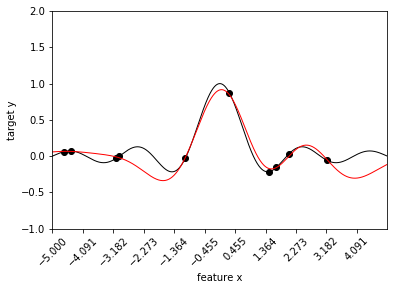

In [5]:
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(yExact, yPred))#均方误差
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(yExact, yPred))#判定系数
# Plot outputs
plt.scatter(x, y,  color='black')
plt.plot(xPred, yExact,  color='black',linewidth=1)
plt.plot(xPred, yPred,   color='red'  ,linewidth=1)

plt.axis([xmin,xmax,-1,2])
step=(xmax-xmin)/11.0
Xlst=list()
for a in np.arange(xmin,xmax,step):
    Xlst.append(a)
plt.xticks(Xlst,rotation=45)
#plt.xticks([-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8])
plt.yticks([-1,-0.5,0,0.5,1.0,1.5,2.0])
plt.xlabel("feature x")
plt.ylabel("target y")

plt.show()